### FUNCTIONS / LIBRARIES

In [1]:
# Functions Preparation
from Preparation import process_cbs_data
from Preparation import final_cbs_pipeline
from Preparation import compute_city_stats
from Preparation import process_gtfs_pipeline
from Preparation import extract_public_lines
from Preparation import snap_interpolated_points_to_routes
from Preparation import lines_analysis
from Preparation import lines_visualisation
from Preparation import line_statistics_pipeline
from Preparation import migration_fairness_lines
from Preparation import all_fairness_lines
from Preparation import process_realtime_with_cbs


import geopandas as gpd
import pandas as pd

### RAW DATA / PARAMETERS 

In [2]:
# Raw Data CBS andcity
cbs_NL  = gpd.read_file("data/cbs_vk100_2021_vol.gpkg") # downloaded 2024
city_border = gpd.read_file("data/Gemeente2.geojson") # For Amsterdam in this case 

# Raw Data GTFS
df_realtime = pd.read_csv('data/gtfs_realtime_data_12_to_19.csv') # realtime GTFS week
gtfs_zip_path = 'data/gtfs-nl.zip' # static GTFS data

# Paramters
start_ts = pd.Timestamp('2024-03-15 05:30:00') # start time for the analysis
end_ts = pd.Timestamp('2024-03-16 05:29:59') # end time for the analysis
agency = 'GVB' # transport provider
buffer_distance = 50  # Buffer distance in meters


### PROCESS

In [3]:
# first process CBS data
cleaned_cbs, nan_summary = process_cbs_data(cbs_NL, city_border) # here we had to shorten column names in functio definition

In [4]:
# second process CBS data, 
full_cbs = final_cbs_pipeline(cleaned_cbs) 

       A_inhab  migration_sum  age_sum
99529      5.0              5        5
99530      5.0              5        5
99752     10.0             10       10
99862     10.0             10       10
99863     10.0             10       10


In [7]:
full_cbs.head(5)

,crs28992,A_inhab,A_0_15,A_15_25,A_25_45,A_45_65,A_65+,G_woz_woni,A_nederlan,A_west_mig,A_n_west_m,geometry,age_sum,migration_sum
99529,E1193N4937,5.0,2,1,0,2,0,526.972907,2,3,0,"MULTIPOLYGON (((119300 493800, 119400 493800, ...",5,5
99530,E1194N4937,5.0,2,0,1,2,0,512.018919,1,1,3,"MULTIPOLYGON (((119400 493800, 119500 493800, ...",5,5
99752,E1193N4935,10.0,1,0,1,0,8,499.853838,3,4,3,"MULTIPOLYGON (((119300 493600, 119400 493600, ...",10,10
99862,E1191N4934,10.0,1,3,2,3,1,524.018880,5,5,0,"MULTIPOLYGON (((119100 493500, 119200 493500, ...",10,10
99863,E1192N4934,10.0,3,2,2,2,1,520.080731,10,0,0,"MULTIPOLYGON (((119200 493500, 119300 493500, ...",10,10


In [8]:
city_stats

,Area,A_inhab,G_woz_woni,A_0_15,A_15_25,A_25_45,A_45_65,A_65+,A_nederlan,A_west_mig,A_n_west_m,P_0_15,P_15_25,P_25_45,P_45_65,P_65+,P_nederlan,P_west_mig,P_n_west_m
0,Amsterdam,870375.0,469.16,122539,108404,317094,210192,112146,382075,172585,315715,14.08,12.45,36.43,24.15,12.88,43.9,19.83,36.27


In [5]:
# get city statistics 
city_stats = compute_city_stats(full_cbs) 

In [6]:
# merge interpolate static and realtime, lines/vehicles statistics
gtfs_realtime_inter_merge, unique_day, points_per_day, min_max_per_day  = process_gtfs_pipeline(df_realtime, gtfs_zip_path, start_ts, end_ts, agency)

2024-03-01 17:57:40 2024-03-19 10:03:08
2024-03-15 05:30:00 2024-03-16 05:29:45


c:\Users\pkoljensic\OneDrive - Delft University of Technology\Desktop\PYTHON\projects\sensing\Fair_Sensing_Repo\Preparation\merge_interpolate_gtfs_static_realtime.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_realtime['label'] = filtered_realtime['label'].astype(int)


['GVB']
[3. 0.]
280
[20240315 20240316]
route_type
3.0    90311
0.0    83209
Name: count, dtype: int64


c:\Users\pkoljensic\OneDrive - Delft University of Technology\Desktop\PYTHON\projects\sensing\sensing_env\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\pkoljensic\OneDrive - Delft University of Technology\Desktop\PYTHON\projects\sensing\sensing_env\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\pkoljensic\OneDrive - Delft University of Technology\Desktop\PYTHON\projects\sensing\sensing_env\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\pkoljensic\OneDrive - Delft University of Technology\Desktop\PYTHON\projects\sensing\sensing_env\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: invalid value encountered in 

In [9]:
# create public lines from GTFS data
public_transport, tram_unique, bus_unique, bus_day_unique, bus_night_unique = extract_public_lines(gtfs_zip_path, agency)


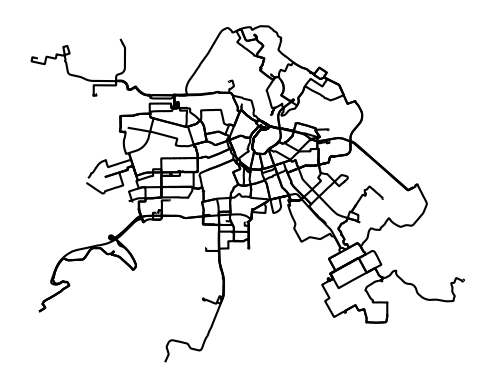

In [17]:

public_transport.plot(edgecolor="black", facecolor="none")
plt.gca().set_axis_off()
plt.gcf().set_facecolor("white")
plt.show()


Processed 949000 values
Processed 950000 values
Processed 950000 values
Processed 951000 values
Processed 951000 values
Processed 952000 values
Processed 953000 values
Processed 954000 values
Processed 955000 values
Processed 956000 values
Processed 957000 values
Processed 957000 values
Processed 958000 values
Processed 959000 values
Processed 960000 values
Processed 961000 values
Processed 962000 values
Processed 963000 values
Processed 964000 values
Processed 965000 values
Processed 966000 values
Processed 967000 values
Processed 968000 values
Processed 969000 values
Processed 970000 values
Processed 970000 values
Processed 971000 values
Processed 972000 values
Processed 973000 values
Processed 974000 values
Processed 975000 values
Processed 976000 values
Processed 977000 values
Processed 978000 values
Processed 978000 values
Processed 979000 values
Processed 979000 values
Processed 980000 values
Processed 981000 values
Processed 982000 values
Processed 983000 values
Processed 984000

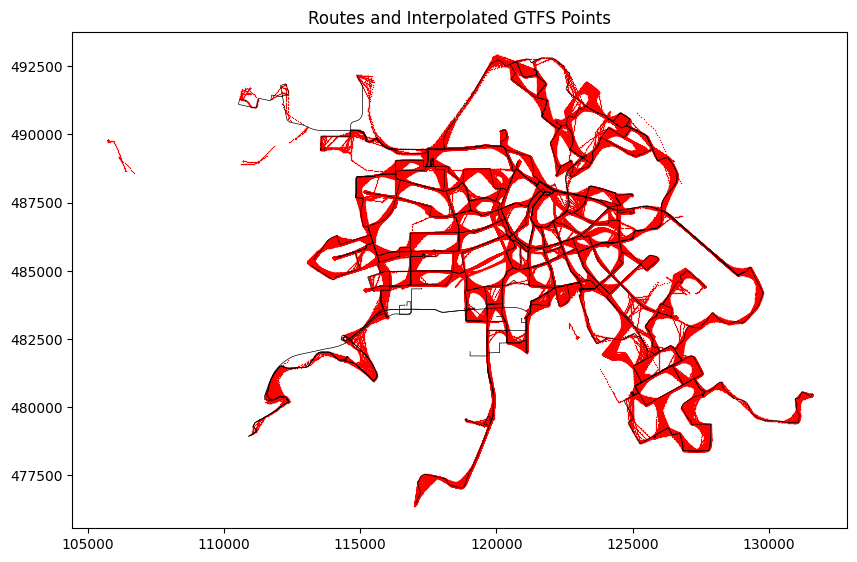

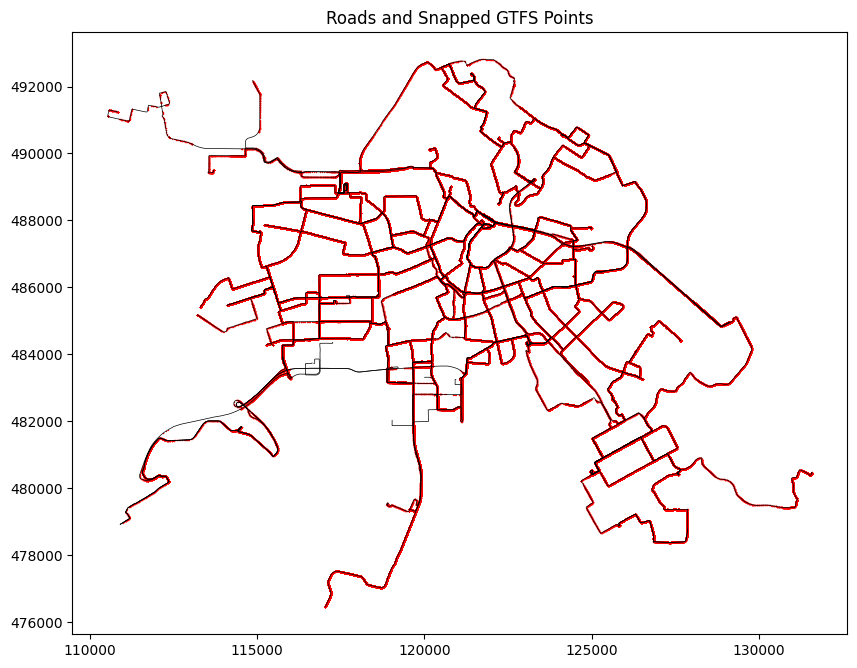

In [9]:
# snap points to lines / routes
snapped_realtime = snap_interpolated_points_to_routes(public_transport, gtfs_realtime_inter_merge)

In [ ]:
#snapped_realtime.to_file('data/temp/snapped_realtime.gpkg', driver='GPKG', index=False)

In [ ]:
#snapped_realtime = gpd.read_file('data/temp/snapped_realtime.gpkg') # read the snapped data back in for analysis

In [19]:
# analysis for lines
sums_df, gdf_meters, cbs_gdf, gdf_projected, joined_gdf, average_stats = lines_analysis(public_transport, full_cbs, buffer_distance)

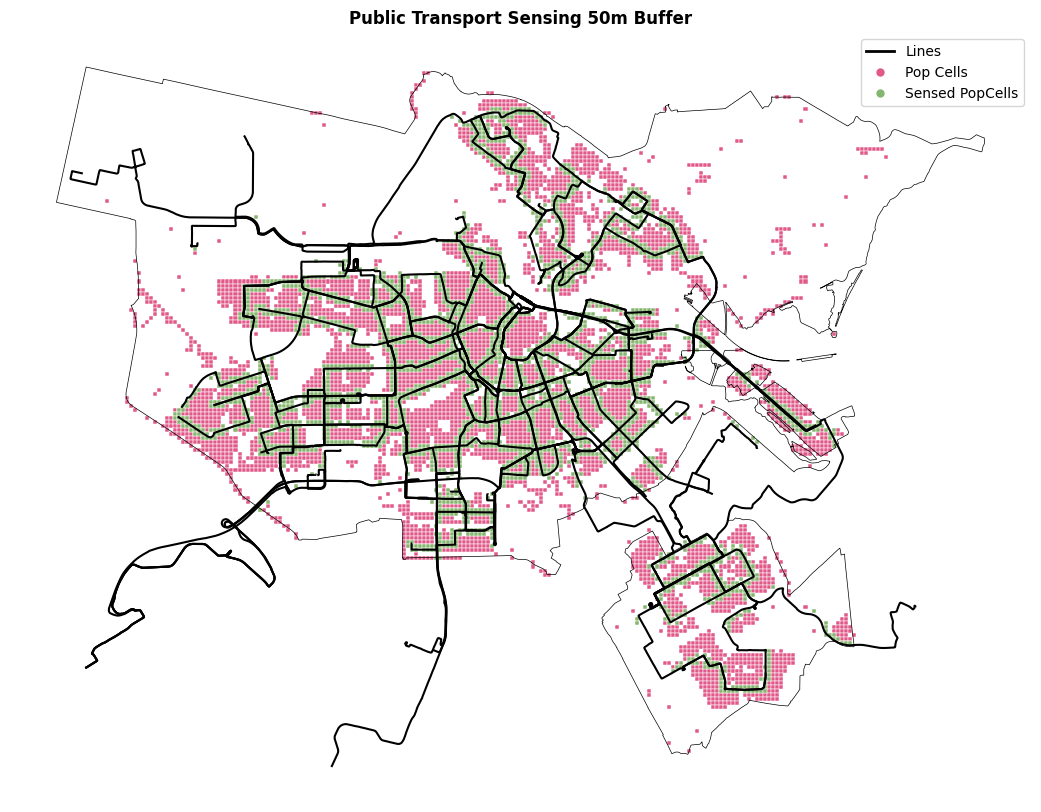

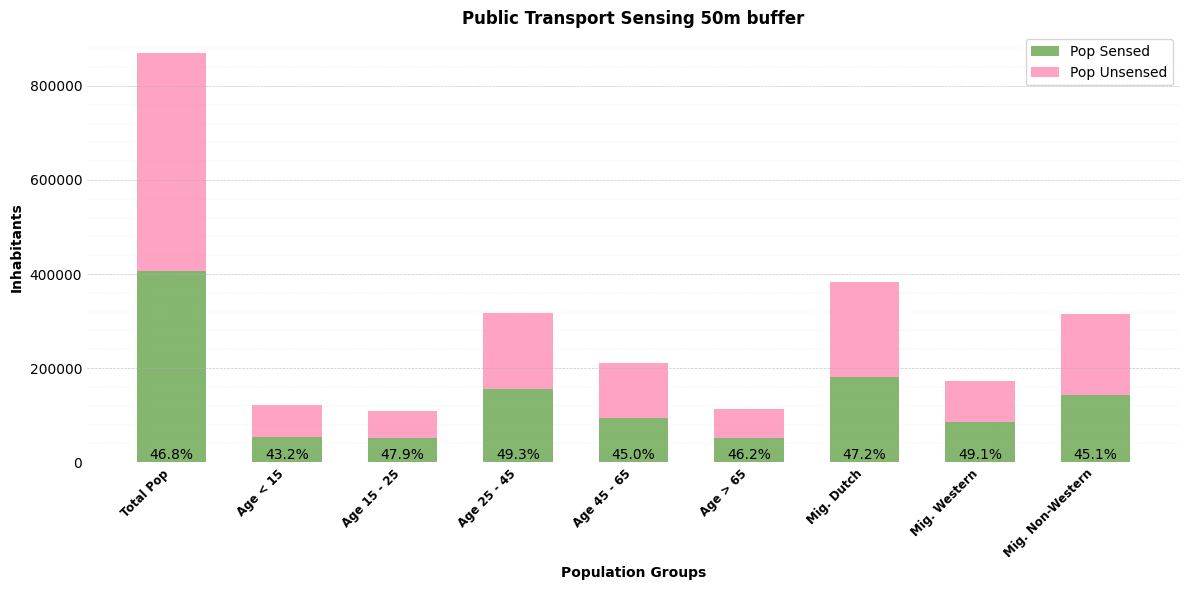

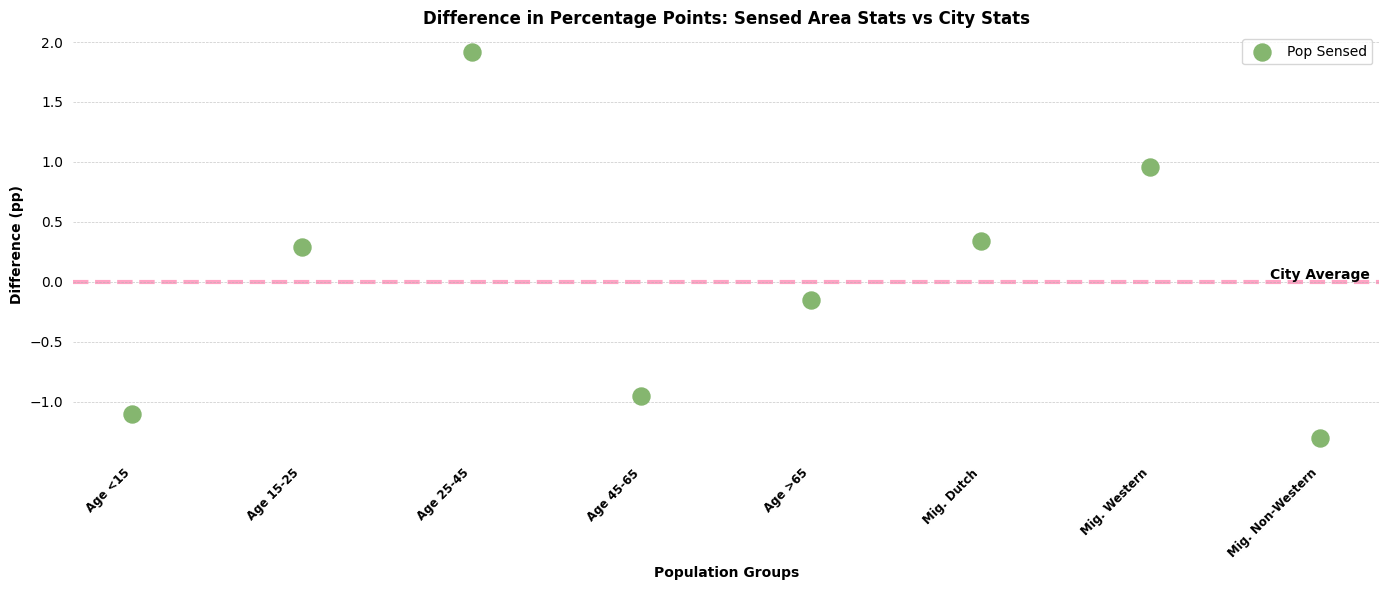

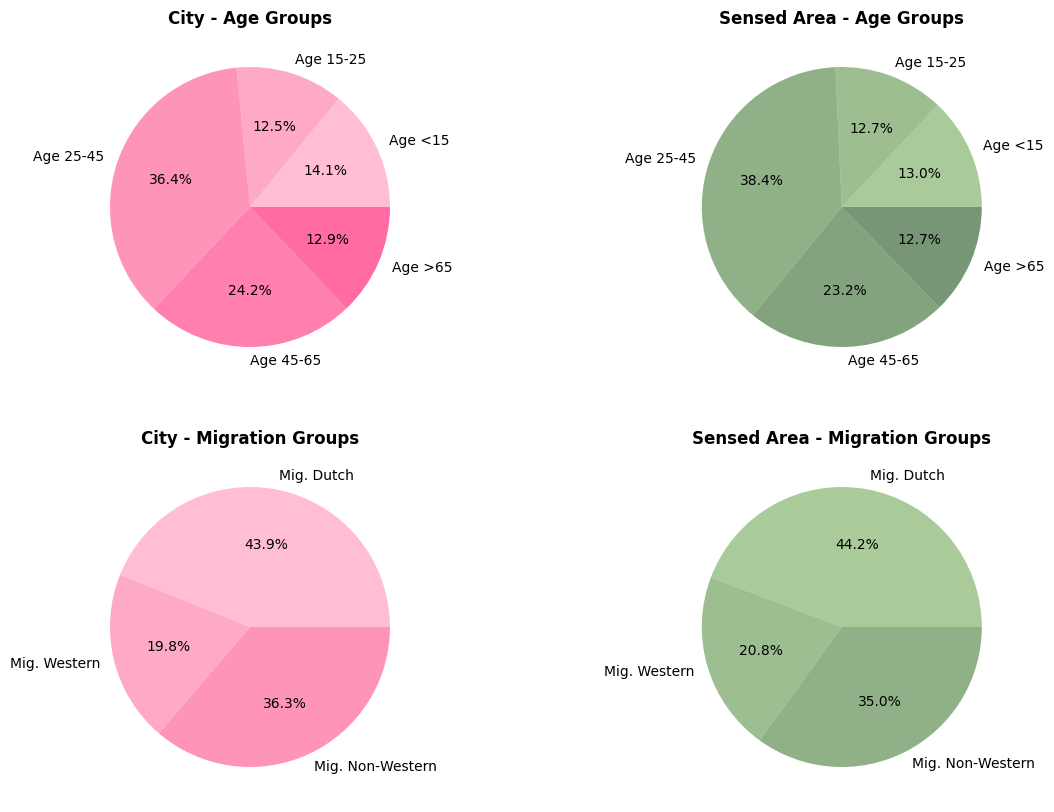

In [20]:
# visualization for lines
lines_map_cover, lines_pop_cover, lines_percentages, lines_pie = lines_visualisation(gdf_projected, cbs_gdf, joined_gdf, city_border, sums_df, average_stats)

In [21]:
# calculation of lines stats
lines_average = line_statistics_pipeline(gdf_projected, public_transport, cbs_gdf, buffer_distance)

In [22]:
lines_average

,route_shor,A_0_15,A_15_25,A_25_45,A_45_65,A_65+,G_woz_woni,A_nederlan,A_west_mig,A_n_west_m,Area,A_Inhab
0,,0.1408,0.1245,0.3643,0.2415,0.1288,469,0.4390,0.1983,0.3627,Amsterdam,870375.0
1,1,0.1030,0.1133,0.4097,0.2402,0.1339,615,0.5165,0.2605,0.2230,Sensed Area,17085.0
2,2,0.1377,0.1194,0.3528,0.2331,0.1570,389,0.4099,0.1945,0.3956,Sensed Area,7460.0
3,3,0.1172,0.1191,0.3934,0.2418,0.1285,452,0.3916,0.1709,0.4375,Sensed Area,12235.0
4,4,0.0925,0.1253,0.4615,0.2108,0.1099,548,0.5264,0.2683,0.2053,Sensed Area,16720.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,40,0.1042,0.1666,0.3942,0.2101,0.1249,406,0.4645,0.1941,0.3414,Sensed Area,17845.0
57,245,0.1400,0.1199,0.3519,0.2357,0.1526,423,0.4320,0.1566,0.4114,Sensed Area,33725.0
58,246,0.1051,0.1228,0.3807,0.2556,0.1358,657,0.5322,0.2595,0.2082,Sensed Area,26505.0
59,247,0.1274,0.1240,0.4461,0.2034,0.0991,397,0.4459,0.2031,0.3510,Sensed Area,28155.0


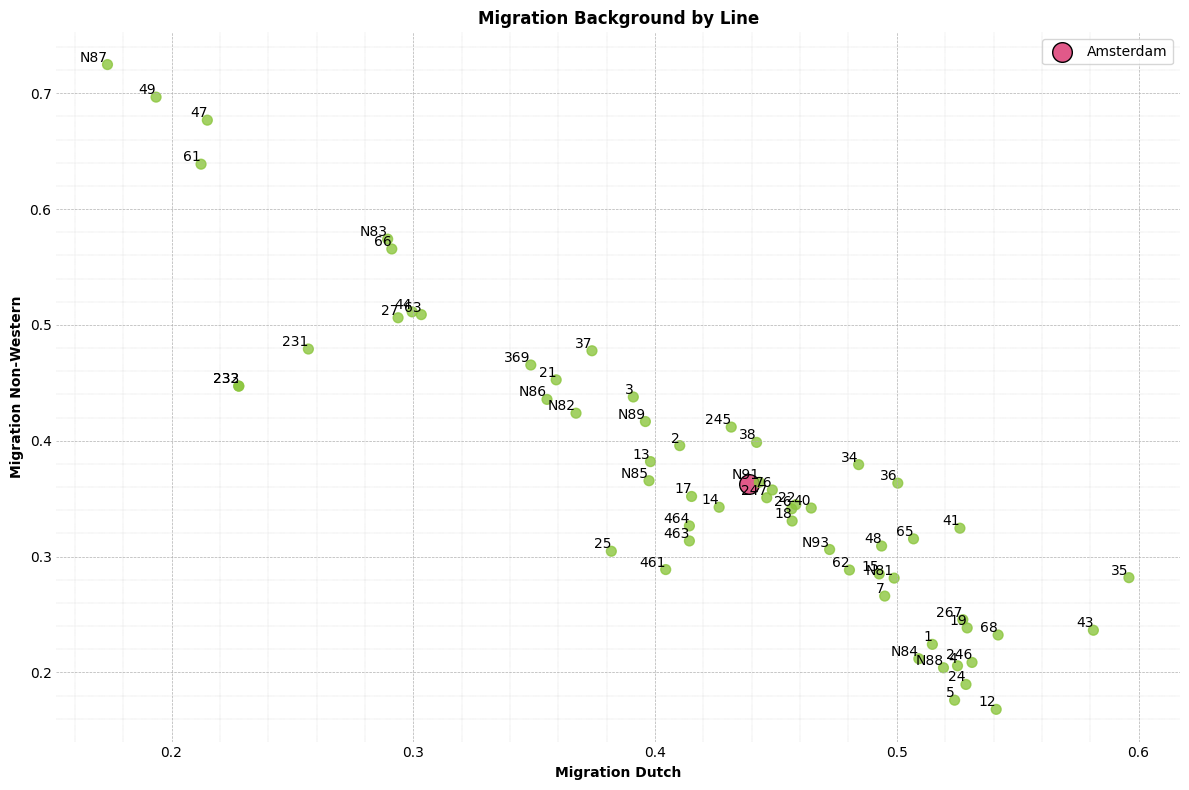

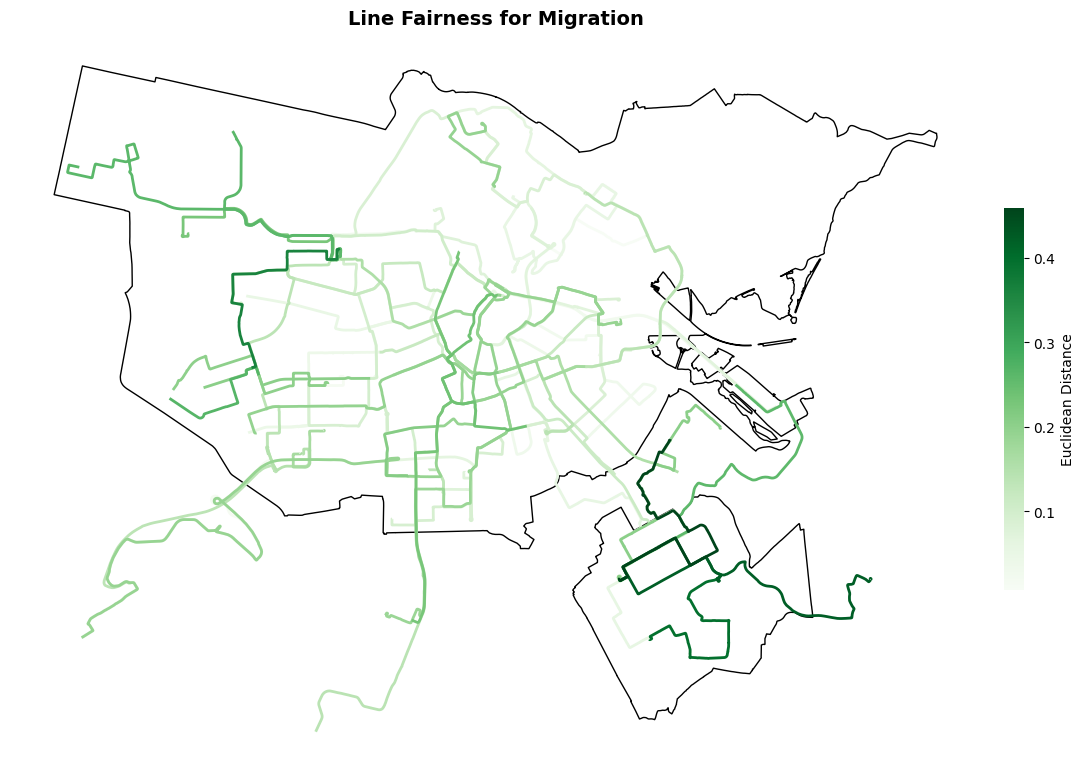

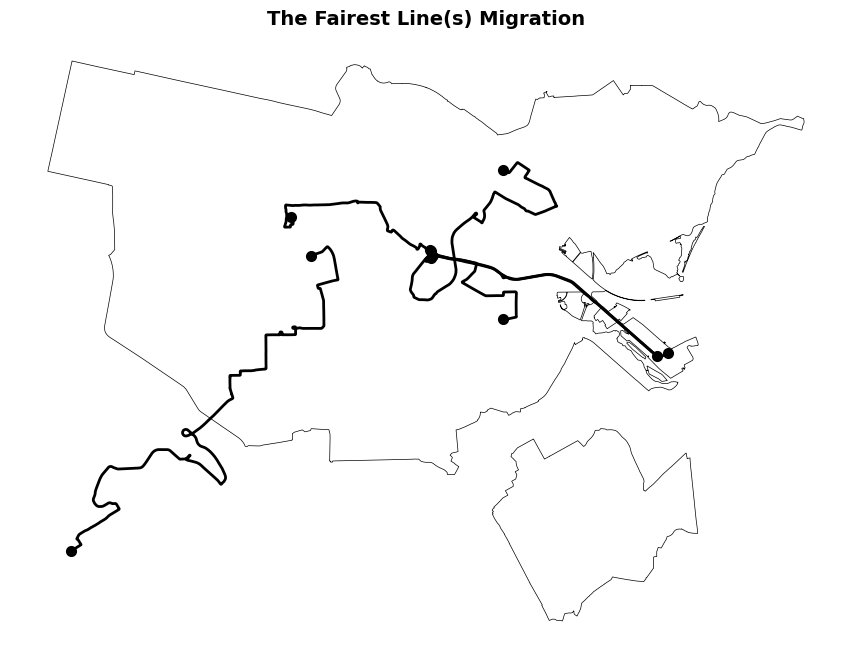

In [14]:
# migration fairness lines 
closest_mig, migration_plot_fig, fairness_lines_mig_fig, top_fair_lines_mig_fig = migration_fairness_lines(lines_average, public_transport, city_border, top_n=5, columns = 'Migration')

# Can we add here normal route plot??

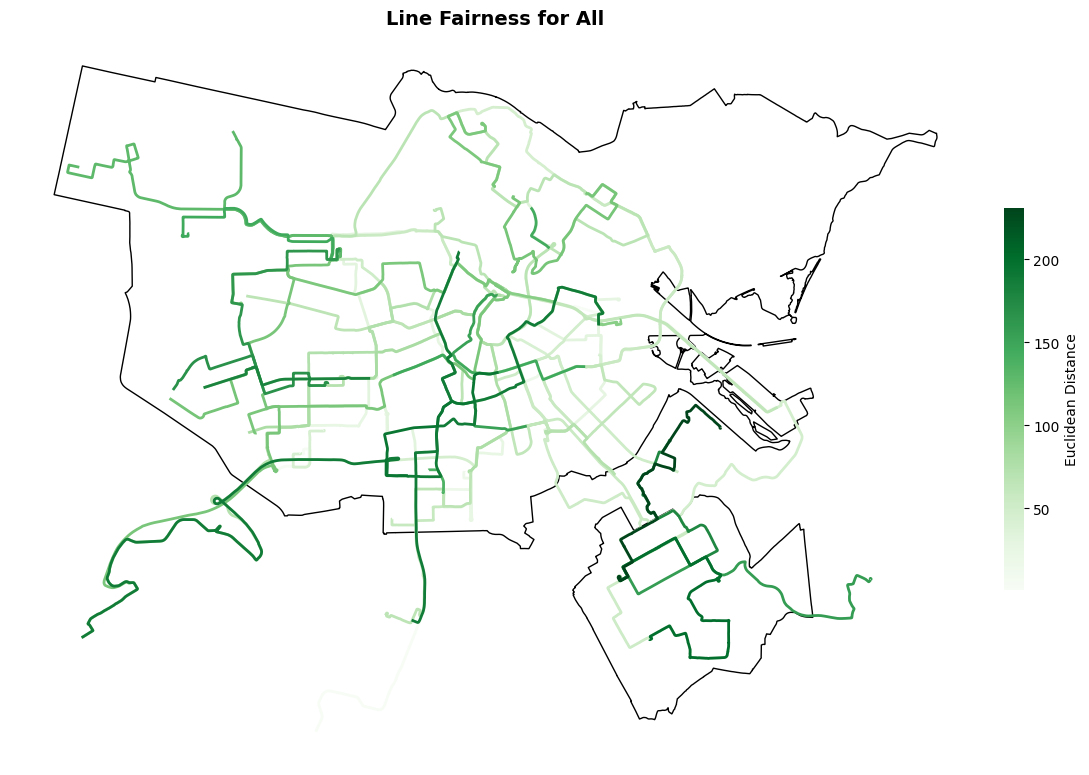

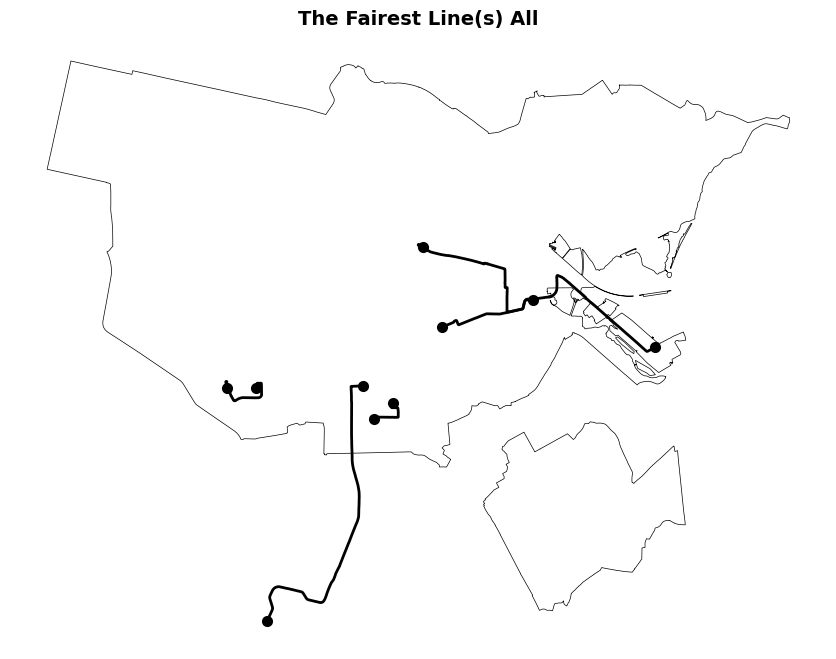

In [15]:
# all fairness lines
closest_all, fairness_lines_fig, top_fair_lines_fig = all_fairness_lines(lines_average, public_transport, city_border, top_n=5, columns= 'All')

In [17]:
full_cbs

,crs28992,A_inhab,A_0_15,A_15_25,A_25_45,A_45_65,A_65+,G_woz_woni,A_nederlan,A_west_mig,A_n_west_m,geometry,age_sum,migration_
99529,E1193N4937,5.0,1,2,1,1,0,516.911094,3,2,0,"MULTIPOLYGON (((119300 493800, 119400 493800, ...",5,5
99530,E1194N4937,5.0,1,0,0,2,2,509.307398,2,1,2,"MULTIPOLYGON (((119400 493800, 119500 493800, ...",5,5
99752,E1193N4935,10.0,2,1,1,1,5,523.671353,4,6,0,"MULTIPOLYGON (((119300 493600, 119400 493600, ...",10,10
99862,E1191N4934,10.0,3,1,1,3,2,533.517295,5,5,0,"MULTIPOLYGON (((119100 493500, 119200 493500, ...",10,10
99863,E1192N4934,10.0,2,1,2,2,3,512.520346,10,0,0,"MULTIPOLYGON (((119200 493500, 119300 493500, ...",10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134716,E1267N4779,25.0,10,0,6,6,3,363.000000,12,5,8,"MULTIPOLYGON (((126700 478000, 126800 478000, ...",25,25
134717,E1268N4779,25.0,6,2,5,1,11,386.000000,18,4,3,"MULTIPOLYGON (((126800 478000, 126900 478000, ...",25,25
135915,E1261N4773,10.0,0,0,10,0,0,502.367853,5,5,0,"MULTIPOLYGON (((126100 477400, 126200 477400, ...",10,10
136536,E1254N4770,10.0,1,0,2,5,2,512.768646,4,3,3,"MULTIPOLYGON (((125400 477100, 125500 477100, ...",10,10


In [18]:
snapped_realtime

,new_timestamp,new_lat,new_lon,uni_id,route_id_left,trip_id,route_type_left,geometry,id
0,1710486369,52.386650,4.838808,1102_GVB,91910,192117436,3.0,POINT (117666.006 488896.112),0000001
1,1710486374,52.386750,4.838810,1102_GVB,91910,192117436,3.0,POINT (117667.868 488896.394),0000002
2,1710486379,52.386849,4.838812,1102_GVB,91910,192117436,3.0,POINT (117684.195 488917.849),0000003
3,1710486384,52.386949,4.838815,1102_GVB,91910,192117436,3.0,POINT (117684.427 488928.923),0000004
4,1710486389,52.387048,4.838817,1102_GVB,91910,192117436,3.0,POINT (117684.658 488939.997),0000005
...,...,...,...,...,...,...,...,...,...
2741831,1710491834,52.282096,4.833996,3070_GVB,91912,191600393,0.0,POINT (117158.711 477306.584),2741832
2741832,1710491839,52.282523,4.834162,3070_GVB,91912,191600393,0.0,POINT (117180.191 477352.334),2741833
2741833,1710491844,52.282951,4.834328,3070_GVB,91912,191600393,0.0,POINT (117200.983 477395.396),2741834
2741834,1710491849,52.283378,4.834493,3070_GVB,91912,191600393,0.0,POINT (117234.563 477447.654),2741835


In [8]:
# group by points with CBS data # get frequency of points in CBS data
grouped_by_points_GVB, cbs_interval_counts_GVB = process_realtime_with_cbs(full_cbs, snapped_realtime) 

In [9]:
grouped_by_points_GVB

,id,uni_id,route_id_left,new_timest,trip_id,route_type_left,crs28992_list,count_crs28992,interval,geometry
0,0000001,1102_GVB,91910,1710486369,192117436,3.0,[E1177N4888],1,7-8,POINT (117666.006 488896.112)
1,0000002,1102_GVB,91910,1710486374,192117436,3.0,[E1177N4888],1,7-8,POINT (117667.868 488896.394)
2,0000003,1102_GVB,91910,1710486379,192117436,3.0,[E1177N4888],1,7-8,POINT (117684.195 488917.849)
3,0000004,1102_GVB,91910,1710486384,192117436,3.0,[E1177N4888],1,7-8,POINT (117684.427 488928.923)
4,0000005,1102_GVB,91910,1710486389,192117436,3.0,[E1177N4888],1,7-8,POINT (117684.658 488939.997)
...,...,...,...,...,...,...,...,...,...,...
2741545,2741546,3070_GVB,91912,1710490169,191600387,0.0,"[E1197N4818, E1196N4818]",2,8-9,POINT (119680.92 481769.527)
2741546,2741547,3070_GVB,91912,1710490174,191600387,0.0,"[E1196N4816, E1197N4816]",2,8-9,POINT (119681.794 481725.515)
2741547,2741548,3070_GVB,91912,1710490179,191600387,0.0,"[E1196N4816, E1197N4816]",2,8-9,POINT (119683.343 481680.806)
2741548,2741549,3070_GVB,91912,1710490184,191600387,0.0,"[E1196N4816, E1197N4816]",2,8-9,POINT (119685.065 481636.45)


In [10]:
cbs_interval_counts_GVB

,crs28992,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14,...,21-22,22-23,23-0,0-1,1-2,2-3,3-4,4-5,count,geometry
0,E1193N4937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((119300 493800, 119400 493800, ..."
1,E1194N4937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((119400 493800, 119500 493800, ..."
2,E1193N4935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((119300 493600, 119400 493600, ..."
3,E1191N4934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((119100 493500, 119200 493500, ..."
4,E1192N4934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((119200 493500, 119300 493500, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,E1267N4779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126700 478000, 126800 478000, ..."
6902,E1268N4779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126800 478000, 126900 478000, ..."
6903,E1261N4773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((126100 477400, 126200 477400, ..."
6904,E1254N4770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((125400 477100, 125500 477100, ..."
